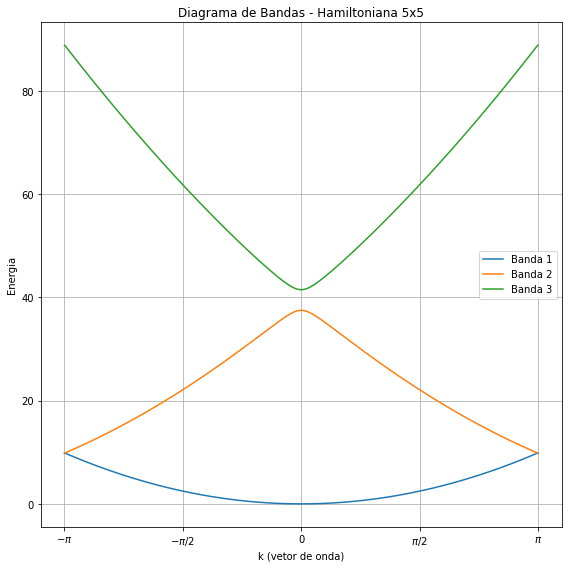

In [10]:
import numpy as np
import matplotlib.pyplot as plt


#Exercíco 6.1 - Diagrama de Bandas para uma Hamiltoniana 5x5

# Índices inteiros
n_vals = np.array([-2, -1, 0, 1, 2])
G_vals = 2 * np.pi * n_vals

# Vetores de onda k no 1º Brillouin zone
k_vals = np.linspace(-np.pi, np.pi, 1000)
bands = []

# Loop sobre k
for k in k_vals:
    H = np.zeros((5, 5))
    for i in range(5):
        H[i, i] = (k - G_vals[i])**2
    H[0, 4] = H[4, 0] = 2.0
    H[1, 3] = H[3, 1] = 2.0
    eigvals = np.linalg.eigvalsh(H)
    bands.append(eigvals)

bands = np.array(bands)

# Plot com rótulos do eixo x em frações de π
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.plot(k_vals, bands[:, i], label=f'Banda {i+1}')

# Customização do eixo x
plt.xticks(
    ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    labels=[r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
)

plt.xlabel("k (vetor de onda)")
plt.ylabel("Energia")
plt.title("Diagrama de Bandas - Hamiltoniana 5x5")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
#Exercíco 6.2 - Calcular a matriz potencial V para uma Hamiltoniana 5x5

import numpy as np

def integral_exp(p):
    # Tratar p=0 para evitar divisão por zero
    if np.isclose(p, 0):
        return 1.0
    else:
        return (np.exp(1j * 2 * np.pi * p) - 1) / (1j * 2 * np.pi * p)

def V_mn(m, n, A, q):
    p1 = q + m - n
    p2 = -q + m - n
    return (A / 2) * (integral_exp(p1) + integral_exp(p2))

# Exemplo: matriz 5x5 com m,n em -2,-1,0,1,2
n_vals = np.array([-2, -1, 0, 1, 2])
A = 2.0
q = 1.0

V_matrix = np.zeros((5, 5), dtype=complex)

for i, m in enumerate(n_vals):
    for j, n in enumerate(n_vals):
        V_matrix[i, j] = V_mn(m, n, A, q)

# Mostrar parte real (potencial é real, imag deve ser ~0 numérico)
print("Matriz V (parte real):")
print(np.real_if_close(V_matrix))

Matriz V (parte real):
[[-7.79634367e-17  1.00000000e+00 -7.79634367e-17 -7.79634367e-17
  -7.79634367e-17]
 [ 1.00000000e+00 -7.79634367e-17  1.00000000e+00 -7.79634367e-17
  -7.79634367e-17]
 [-7.79634367e-17  1.00000000e+00 -7.79634367e-17  1.00000000e+00
  -7.79634367e-17]
 [-7.79634367e-17 -7.79634367e-17  1.00000000e+00 -7.79634367e-17
   1.00000000e+00]
 [-7.79634367e-17 -7.79634367e-17 -7.79634367e-17  1.00000000e+00
  -7.79634367e-17]]


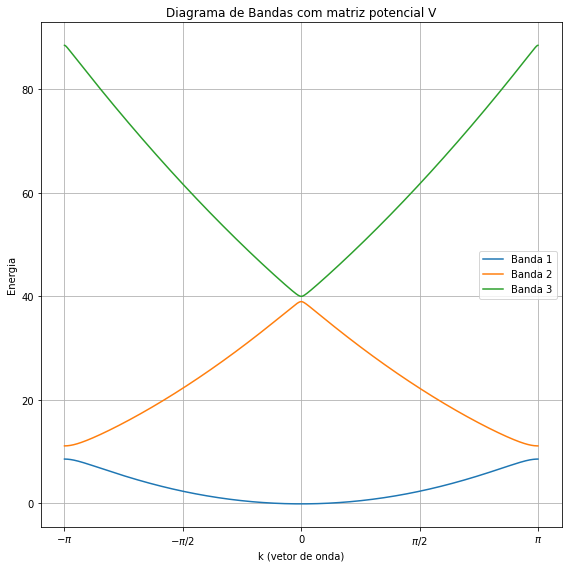

In [ ]:
#Exercício 6.3 - Calcular a matriz Hamiltoniana H incluindo o potencial V. 

import numpy as np
import matplotlib.pyplot as plt

def integral_exp(p):
    if np.isclose(p, 0):
        return 1.0
    else:
        return (np.exp(1j * 2 * np.pi * p) - 1) / (1j * 2 * np.pi * p)

def V_mn(m, n, A, q):
    p1 = q + m - n
    p2 = -q + m - n
    return (A / 2) * (integral_exp(p1) + integral_exp(p2))

# Parâmetros
n_vals = np.array([-2, -1, 0, 1, 2])
A = 3.0
q = 0.5

# Construir matriz do potencial V (fixa, independe de k)
N = len(n_vals)
V_matrix = np.zeros((N, N), dtype=complex)
for i, m in enumerate(n_vals):
    for j, n in enumerate(n_vals):
        V_matrix[i, j] = V_mn(m, n, A, q)
# Garantir matriz hermitiana real (pequenas partes imaginárias numéricas)
V_matrix = (V_matrix + V_matrix.conj().T) / 2
V_matrix = np.real_if_close(V_matrix)

# Valores de k na primeira zona de Brillouin
k_vals = np.linspace(-np.pi, np.pi, 1000)
bands = []

for k in k_vals:
    # Matriz cinética diagonal
    T_matrix = np.diag((k - 2*np.pi*n_vals)**2)
    # Hamiltoniana total
    H = T_matrix + V_matrix
    # Diagonalizar
    eigvals = np.linalg.eigvalsh(H)
    bands.append(eigvals)

bands = np.array(bands)

# Plot das bandas
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.plot(k_vals, bands[:, i], label=f'Banda {i+1}')

plt.xticks(
    ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    labels=[r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
)
plt.xlabel("k (vetor de onda)")
plt.ylabel("Energia")
plt.title("Diagrama de Bandas com matriz potencial V")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
